# Quality Assessment Gene Expression Legionella Infection

In [9]:
import pandas
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data Frame

In [163]:
gene_expression = pandas.DataFrame.from_csv('normalized-counts-labels.csv')
ge_nonames = gene_expression.drop('Name', axis=1)
gene_expression.shape

(41424, 25)

### Preprocessing: Remove genes with many zeros

In [165]:
ge_zeros_removed = ge_nonames[ge_nonames.astype('bool').mean(axis=1)>=.5]
ge_zeros_removed.shape

(26403, 24)

### Preprocessing: Scaling the gene expression over genes

In [167]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(ge_zeros_removed)
ge_scaled = pandas.DataFrame(scaled_features,
                             index=ge_zeros_removed.index,
                             columns=ge_zeros_removed.columns)
ge_scaled.shape

(26403, 24)

### Preprocessing: Remove low variance genes

607075035198.0


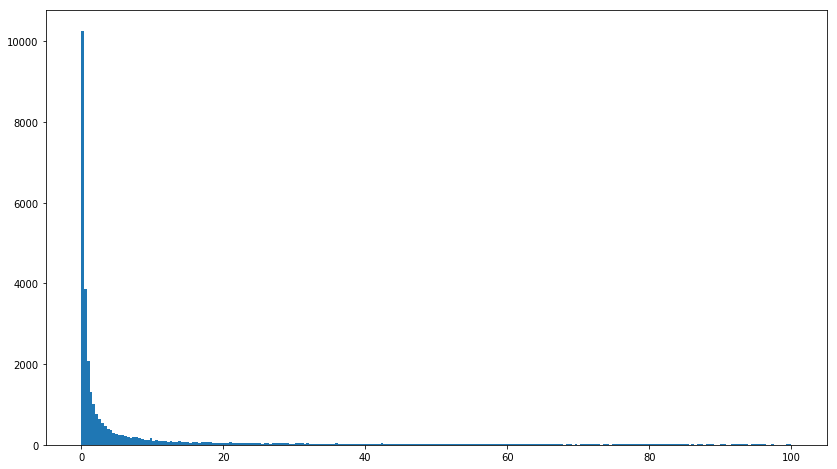

In [206]:
var_genes = ge_nonames.var(axis=1)
threshold_percent = int((var_genes.shape[0] / 100.)*10)
highest_20_percent_var = var_genes.sort_values(ascending=False)[:threshold_percent]
ge_high_var = ge_scaled.loc[highest_20_percent_var.index]
ge_high_var.shape

fig = plt.figure(figsize=(14, 8))
bins = np.linspace(0, 100, 250)
h = plt.hist(var_genes, bins)

### PCA of genes

In [207]:
pca = PCA(n_components=5, whiten=True)
reduced = pca.fit_transform(ge_high_var)
reduced.shape

(4142, 5)

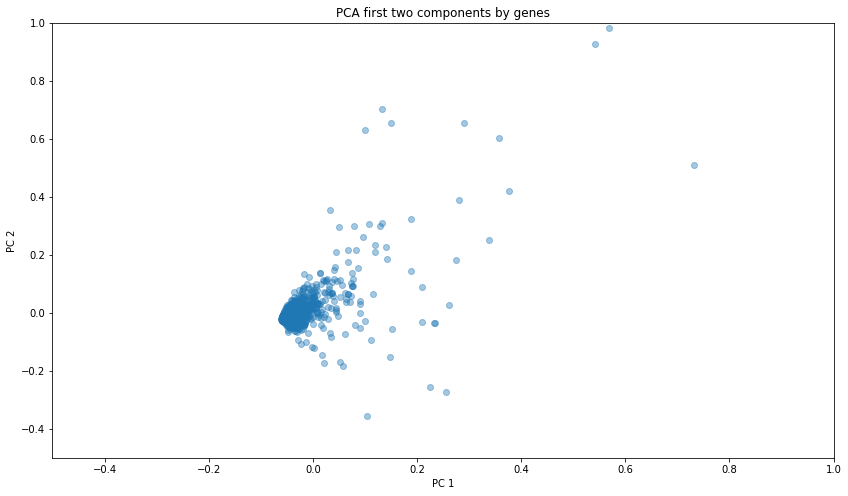

In [208]:
fig = plt.figure(figsize=(14, 8))
plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.4)
plt.xlim([-.5, 1])
plt.ylim([-.5, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA first two components by genes')

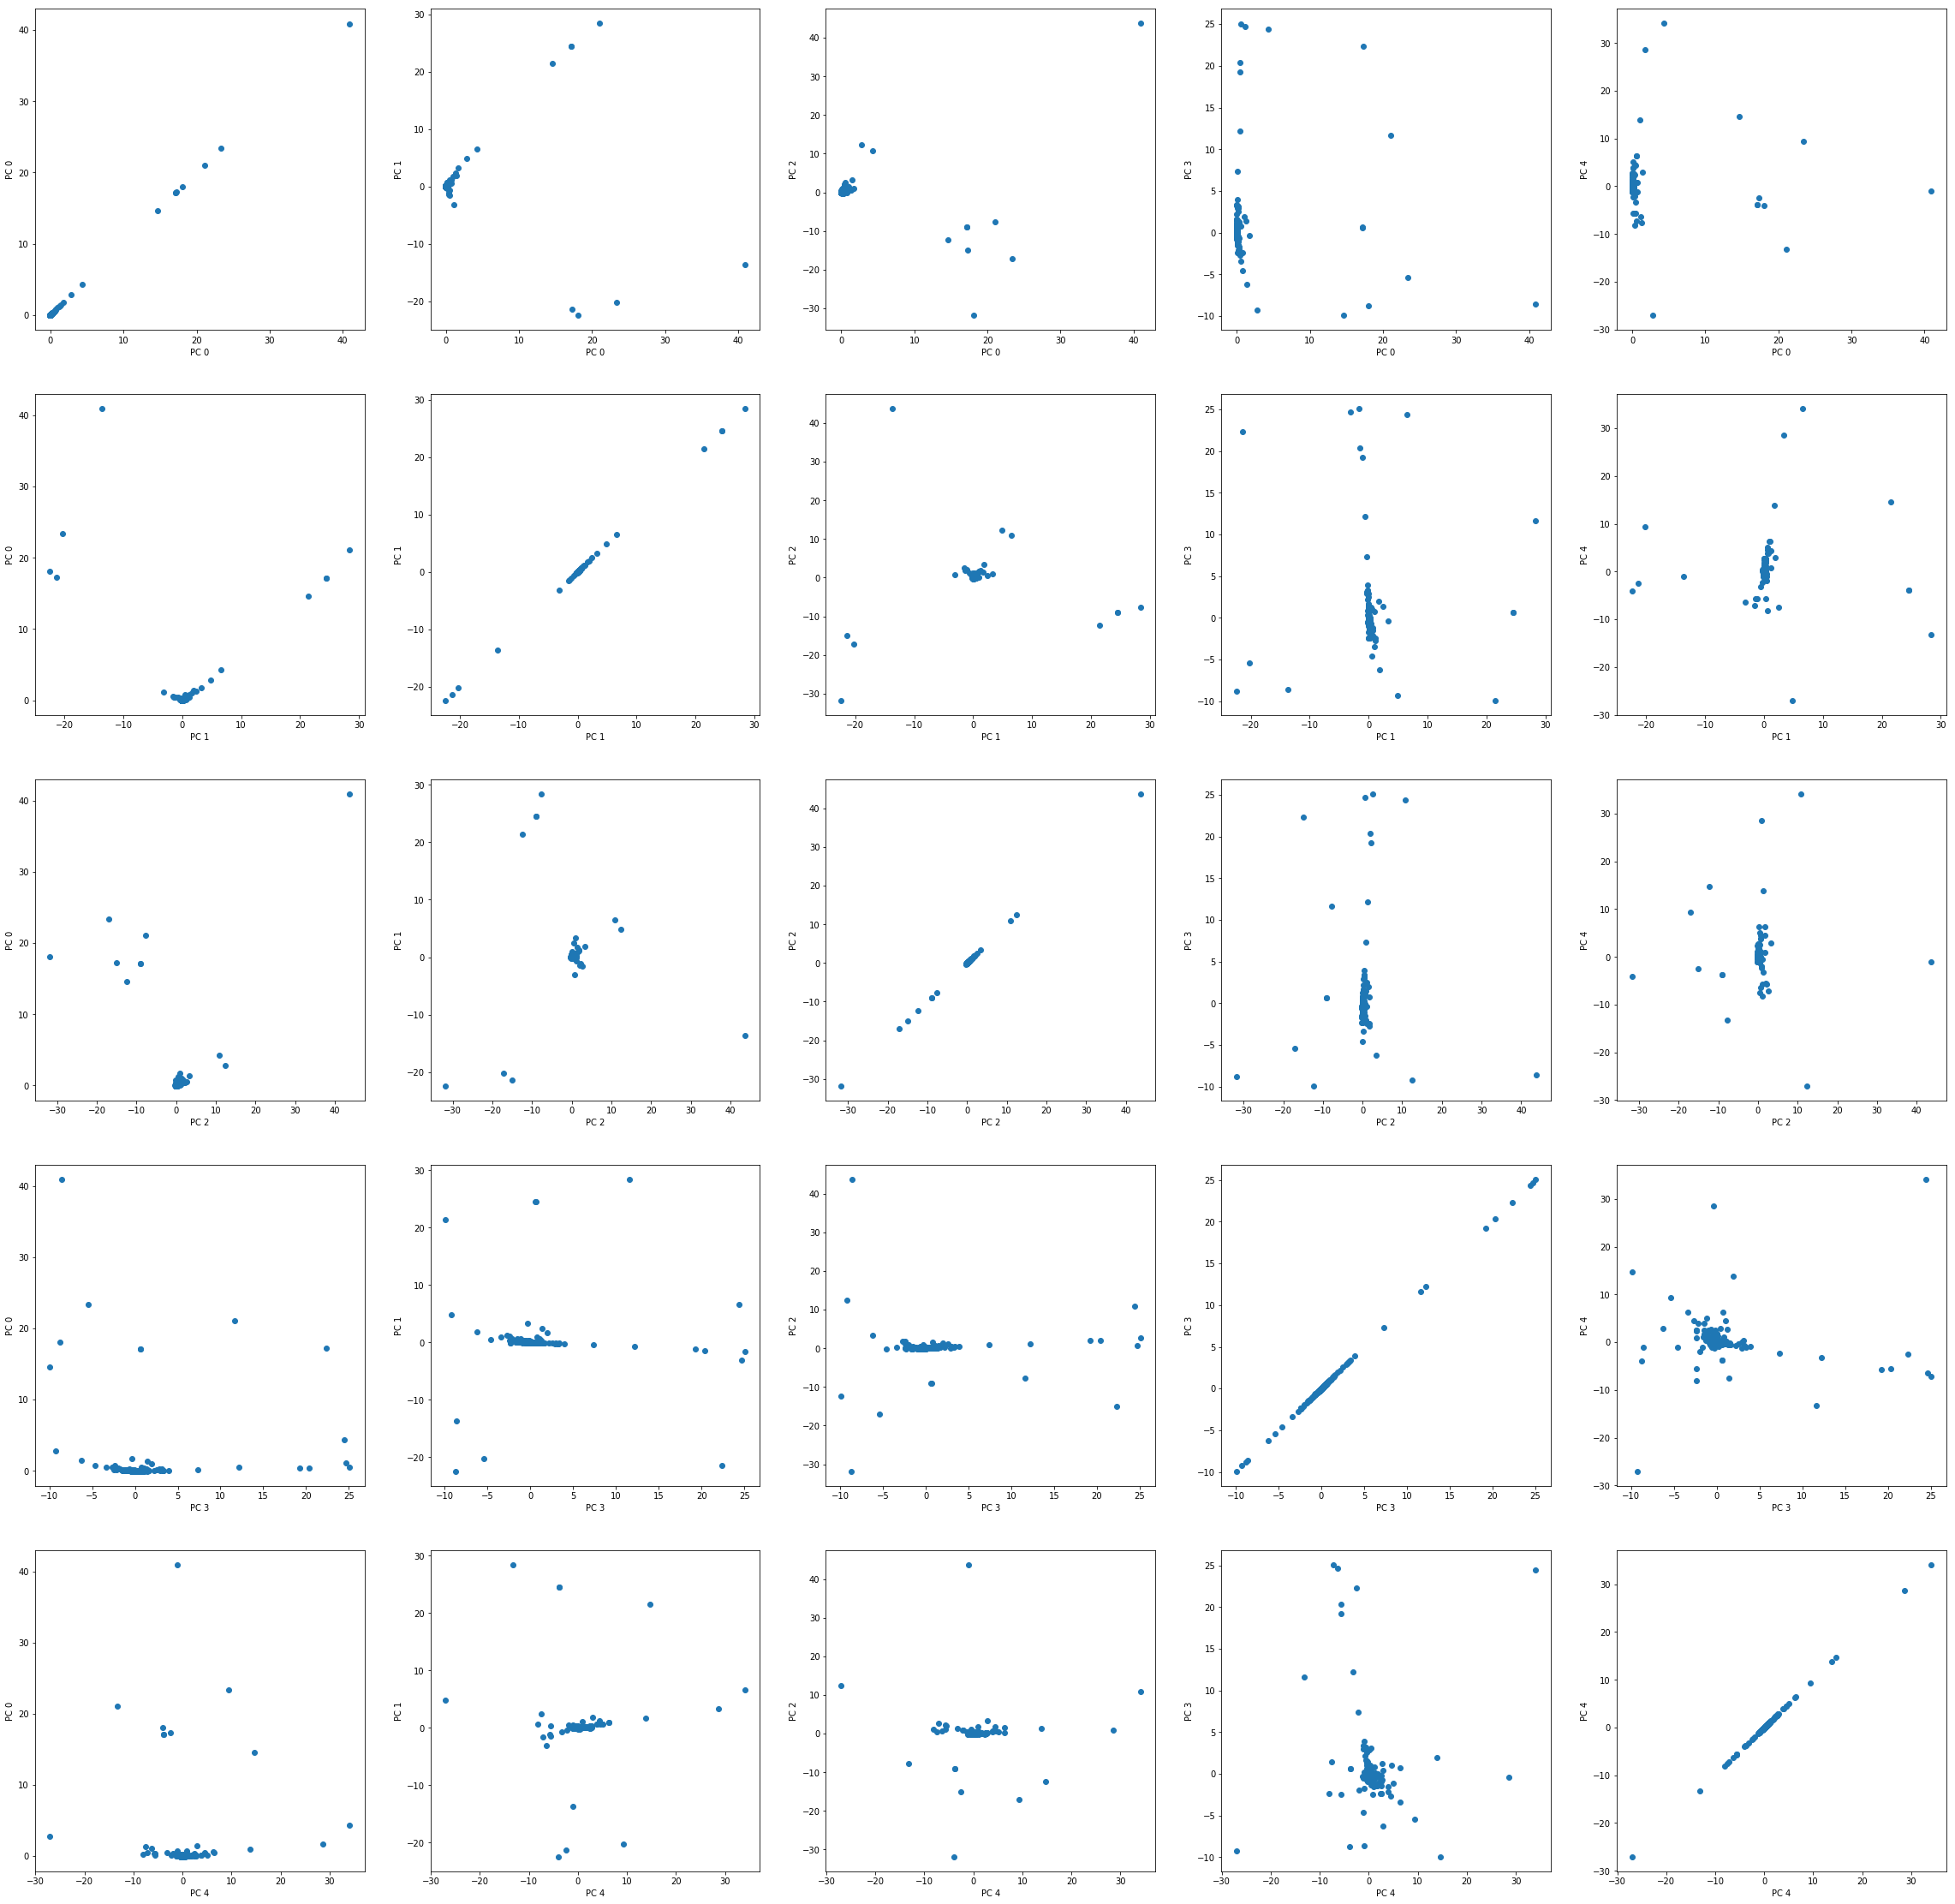

In [209]:
fig = plt.figure(figsize=(40, 40))
count = 1
for x in range(5):
    for y in range(5):
        plt.subplot(5, 5, count)
        plt.scatter(reduced[:, x], reduced[:, y])
        plt.xlabel('PC {}'.format(x))
        plt.ylabel('PC {}'.format(y))
        count += 1

## PCA of experiment type

In [210]:
pca2 = PCA(n_components=3, whiten=True)
pca_per_class = pca2.fit_transform(ge_high_var.transpose())
pca_per_class.shape

(24, 3)

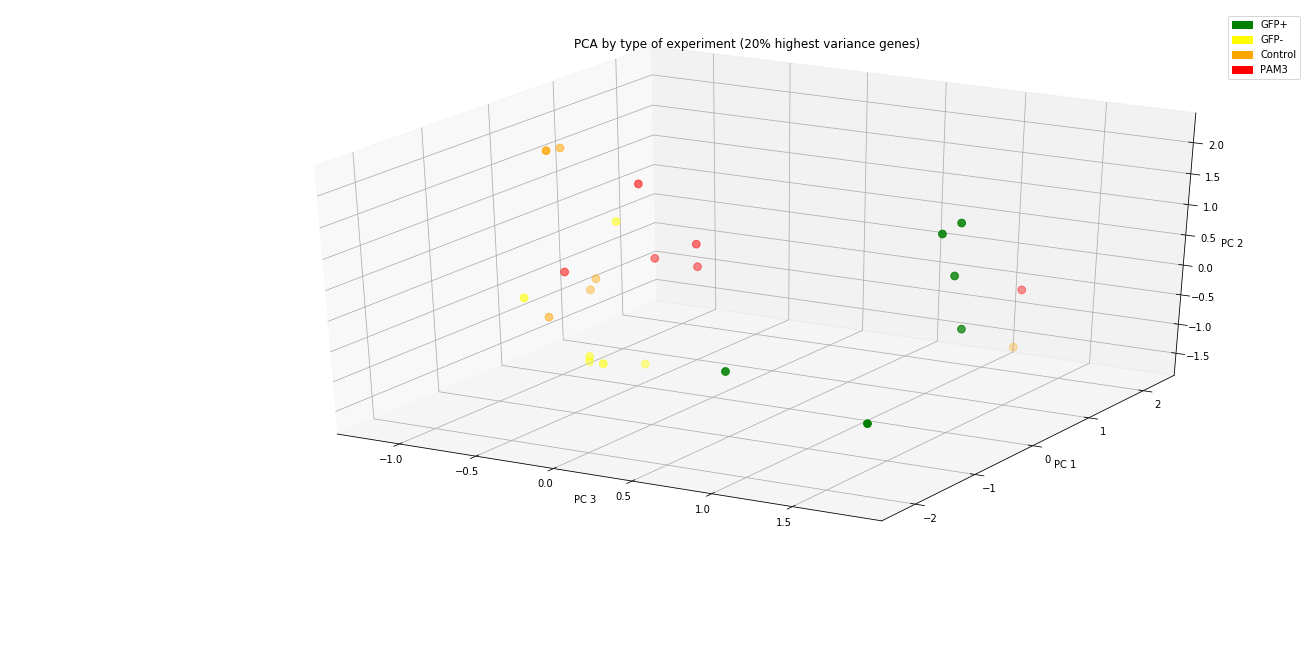

In [211]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
# get colors for labels
colors = []
labels = []
for names in ge_nonames.transpose().index:
    if names.startswith('Control'):
        colors.append('orange')
        labels.append('Control')
    elif names.startswith('gfpp'):
        colors.append('green')
        labels.append('GFP+')
    elif names.startswith('gfpm'):
        colors.append('yellow')
        labels.append('GFP-')
    elif names.startswith('Pam'):
        colors.append('red')
        labels.append('Replicates')
    else:
        print ('Group {} not recognized'.format(names))

ax.scatter(pca_per_class[:, 2], pca_per_class[:, 0], pca_per_class[:, 1],
           c=colors, label=labels, s=60)
plt.xlabel('PC 3')
plt.ylabel('PC 1')
ax.set_zlabel('PC 2')
plt.title('PCA by type of experiment (20% highest variance genes)')

# legend
gfpp_patch = mpatches.Patch(color='green', label='GFP+')
gfpm_patch = mpatches.Patch(color='yellow', label='GFP-')
control_patch = mpatches.Patch(color='orange', label='Control')
replicate_patch = mpatches.Patch(color='red', label='PAM3')
plt.legend(handles=[gfpp_patch, gfpm_patch, control_patch, replicate_patch])

# annotate names
count = 0
for names in ge_nonames.transpose().index:
    plt.annotate(names, (pca_per_class[count, 0], pca_per_class[count, 1]))
    count += 1

fig.savefig('pca_by_types.png', dpi=300)

## Get Loadings per Experiment Type

In [216]:
fig = plt.figure(20, 10)
for comp in range(pca2.n_components):
    plt.subplot(1, 3, comp)
    loadings = pca2.components_[comp]
    order = loadings.argsort()

0
1
2


In [218]:
comp=0
loadings = pca2.components_[comp]
order = loadings.argsort()


array([2, 3, 1, ..., 6, 5, 4])